In [3]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


In [4]:
#Load Data
data = pd.read_csv("cleaneddata.csv")
data.head(10)

,Condition,Cylinder heating zone 1,Cylinder heating zone 2,Cylinder heating zone 3,Cylinder heating zone 4,Cylinder heating zone 5,Mould temperature control unit 1,Maximum injection pressure,Injection time,Dosage time,Cycle time,Switch-over volume,Material cushion
0,Normal1,288.350000,299.230000,322.160000,295.85,314.590000,89.59,1561.720000,0.234000,3.13600,27.870000,1.443340,0.918447
1,Normal1,281.620000,290.250000,296.760000,297.53,310.640000,89.37,1548.980000,0.224000,2.99800,27.548000,1.413340,0.929772
2,Normal1,285.520000,304.260000,311.490000,302.41,320.420000,89.96,1419.080000,0.234000,2.99800,30.216000,1.443340,0.899388
3,Normal1,278.513125,286.230000,320.730000,319.29,327.560000,86.06,1565.210000,0.234000,2.94175,28.256000,1.343340,0.996952
4,Normal1,273.880000,280.360000,299.980000,299.78,304.210000,89.66,1515.130000,0.224000,3.11800,27.976000,1.473340,0.929580
5,Normal1,268.110000,291.140000,309.150000,302.24,322.930000,93.56,1583.940000,0.224000,3.11000,28.816000,1.405215,0.912977
6,Normal1,272.700000,296.695208,310.539583,322.48,313.220000,90.92,1545.820208,0.224000,2.98800,28.800958,1.393340,0.953863
7,Normal1,265.850000,284.430000,321.890000,310.26,313.630000,85.63,1518.070000,0.224000,2.95000,27.518000,1.403340,0.965242
8,Normal1,288.280000,299.280000,313.050000,317.75,316.570625,87.61,1482.730000,0.224000,3.05600,29.678000,1.403340,0.922977
9,Normal1,270.150000,287.190000,324.990000,295.15,299.870000,94.17,1472.170000,0.233167,2.80600,29.008000,1.483340,0.914110


In [7]:
#Summarize of Data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cylinder heating zone 1,116.0,281.019283,9.198632,265.850000,273.255000,280.650000,288.287500,303.87000
Cylinder heating zone 2,116.0,298.033796,9.816407,280.360000,290.165000,299.345000,306.142500,320.00000
Cylinder heating zone 3,116.0,312.661764,10.262570,294.710000,304.697500,311.645000,321.930417,335.46000
Cylinder heating zone 4,116.0,311.684035,9.772969,294.750000,302.462500,313.230000,319.167500,334.03000
Cylinder heating zone 5,116.0,318.128118,9.028320,299.870000,312.525000,317.905000,325.434167,340.96000
Mould temperature control unit 1,116.0,89.985427,2.375933,85.630000,88.237500,90.125000,91.492500,94.37000
Maximum injection pressure,116.0,1530.529502,49.458811,1419.080000,1487.725000,1533.205000,1566.557500,1636.00000
Injection time,116.0,0.232311,0.008098,0.218000,0.224000,0.234000,0.238000,0.24400
Dosage time,116.0,2.907734,0.093539,2.706000,2.840500,2.909000,2.970000,3.13600
Cycle time,116.0,28.779633,0.832908,27.418000,28.024500,28.790000,29.490500,30.30200


In [9]:
#Normalize Data Predictors (Zero-score normalization)
target_column = ['Condition']
predictors = list(set(list(data.columns))-set(target_column))
data[predictors] = data[predictors]/data[predictors].max()
data[0:10]

,Condition,Cylinder heating zone 1,Cylinder heating zone 2,Cylinder heating zone 3,Cylinder heating zone 4,Cylinder heating zone 5,Mould temperature control unit 1,Maximum injection pressure,Injection time,Dosage time,Cycle time,Switch-over volume,Material cushion
0,Normal1,0.948926,0.935094,0.960353,0.885699,0.922660,0.949348,0.954597,0.959016,1.000000,0.919741,0.882723,0.812505
1,Normal1,0.926778,0.907031,0.884636,0.890728,0.911075,0.947017,0.946809,0.918033,0.955995,0.909115,0.864375,0.822523
2,Normal1,0.939612,0.950812,0.928546,0.905338,0.939758,0.953269,0.867408,0.959016,0.955995,0.997162,0.882723,0.795644
3,Normal1,0.916554,0.894469,0.956090,0.955872,0.960699,0.911942,0.956730,0.959016,0.938058,0.932480,0.821564,0.881954
4,Normal1,0.901306,0.876125,0.894235,0.897464,0.892216,0.950090,0.926119,0.918033,0.994260,0.923239,0.901070,0.822353
5,Normal1,0.882318,0.909812,0.921570,0.904829,0.947120,0.991417,0.968178,0.918033,0.991709,0.950960,0.859406,0.807665
6,Normal1,0.897423,0.927173,0.925713,0.965422,0.918641,0.963442,0.944878,0.918033,0.952806,0.950464,0.852144,0.843836
7,Normal1,0.874881,0.888844,0.959548,0.928839,0.919844,0.907386,0.927916,0.918033,0.940689,0.908125,0.858259,0.853902
8,Normal1,0.948695,0.935250,0.933196,0.951262,0.928469,0.928367,0.906314,0.918033,0.974490,0.979407,0.858259,0.816512
9,Normal1,0.889031,0.897469,0.968789,0.883603,0.879487,0.997881,0.899859,0.955601,0.894770,0.957297,0.907186,0.808668


In [11]:
#Create Training and Testing Datasets
# Assuming predictors and target_column are already defined
X = data[predictors].values
y = data[target_column].values

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Checking the shapes of the resulting splits
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (81, 12)
Testing data shape: (35, 12)


In [13]:
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time  # Import the time module

# Suppress all warnings
warnings.filterwarnings('ignore')

# Start the timer
start_time = time.time()

# Build the neural network model with 3 hidden layers, each with 20 neurons
mlp = MLPClassifier(
    hidden_layer_sizes=(20,20),    # 3 hidden layers, each with 20 neurons
    activation='relu',                  # ReLU activation function
    solver='adam',                      # Adam optimizer
    max_iter=1000,                      # Maximum iterations for training
    random_state=0,                     # For reproducibility
    learning_rate_init=0.001
)

# Train the model
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Neural Network model:", accuracy)

# Stop the timer and calculate runtime
end_time = time.time()
runtime = end_time - start_time
print(f"Runtime of the code: {runtime:.2f} seconds")


Accuracy of the Neural Network model: 0.9142857142857143
Runtime of the code: 1.20 seconds


In [15]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate MLP Model on Training Data
predict_train = mlp.predict(X_train)
print("MLP confusion_matrix (Train):")
print(confusion_matrix(y_train, predict_train))
print("\n")

print("MLP classification report (Train):")
print(classification_report(y_train, predict_train))

# Evaluate MLP Model on Test Data
predict_test = mlp.predict(X_test)
print("MLP confusion_matrix (Test):")
print(confusion_matrix(y_test, predict_test))
print("\n")

print("MLP classification report (Test):")
print(classification_report(y_test, predict_test))


MLP confusion_matrix (Train):
[[17  0  1]
 [ 0 29  0]
 [ 1  0 33]]


MLP classification report (Train):
              precision    recall  f1-score   support

  Condition1       0.94      0.94      0.94        18
  Condition3       1.00      1.00      1.00        29
     Normal1       0.97      0.97      0.97        34

    accuracy                           0.98        81
   macro avg       0.97      0.97      0.97        81
weighted avg       0.98      0.98      0.98        81

MLP confusion_matrix (Test):
[[ 6  0  2]
 [ 0 11  0]
 [ 1  0 15]]


MLP classification report (Test):
              precision    recall  f1-score   support

  Condition1       0.86      0.75      0.80         8
  Condition3       1.00      1.00      1.00        11
     Normal1       0.88      0.94      0.91        16

    accuracy                           0.91        35
   macro avg       0.91      0.90      0.90        35
weighted avg       0.91      0.91      0.91        35



In [220]:
import random
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time
import pandas as pd

# Start the timer
start_time = time.time()

# Load Data (assuming cleaneddata.csv is the dataset you're working with)
data = pd.read_csv("cleaneddata.csv")

# Normalize Data Predictors (Zero-score normalization)
target_column = ['Condition']
predictors = list(set(data.columns) - set(target_column))
data[predictors] = data[predictors] / data[predictors].max()

# Prepare Data
X = data[predictors].values
y = data[target_column].values.ravel()

# Split Data into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the range of hyperparameters to test
activation_functions = ['relu', 'tanh', 'logistic']
solvers = ['adam', 'sgd', 'lbfgs']
iterations = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# Define the possible sizes of neurons per hidden layer
hidden_layer_sizes_range = [(5,), (10,), (15,), (20,), (10, 10), (20, 20), (30, 30), (40, 40)]
learning_rates = [0.001, 0.01, 0.1]

# To store all results
results = []

# Loop through all combinations of hyperparameters ensuring fairness
for activation in activation_functions:
    for solver in solvers:
        for max_iter in iterations:
            for learning_rate in learning_rates:
                for hidden_layers in hidden_layer_sizes_range:
                    # Build the neural network model
                    mlp = MLPClassifier(
                        hidden_layer_sizes=hidden_layers,
                        activation=activation,
                        solver=solver,
                        max_iter=max_iter,
                        random_state=0,
                        learning_rate_init=learning_rate
                    )

                    # Use cross-validation to get a more stable estimate of model performance
                    accuracy_scores = cross_val_score(mlp, X_train, y_train, cv=3, scoring='accuracy')  # 3-fold CV
                    mean_accuracy = accuracy_scores.mean()

                    # Store the result
                    result = (mean_accuracy, activation, solver, max_iter, learning_rate, hidden_layers)
                    results.append(result)

# Sort the results based on accuracy (descending), max_iter (ascending), and others
results = sorted(results, key=lambda x: (-x[0], x[3], x[4], x[5]))  # Accuracy desc, max_iter asc

# Print the top 3 results
print("\nTop 3 Configurations:")
for idx, result in enumerate(results[:3], start=1):  # Take only the top 3
    mean_accuracy, activation, solver, max_iter, learning_rate, hidden_layer = result
    print(f"Rank {idx}: Accuracy: {mean_accuracy:.4f} | Activation: {activation}, Solver: {solver}, "
          f"Max Iterations: {max_iter}, Learning Rate: {learning_rate}, Hidden Layers: {hidden_layer}")

# Stop the timer and print runtime
end_time = time.time()
runtime = end_time - start_time
print(f"\nTotal Runtime: {runtime:.2f} seconds")



Top 3 Configurations:
Rank 1: Accuracy: 0.9877 | Activation: relu, Solver: adam, Max Iterations: 100, Learning Rate: 0.01, Hidden Layers: (40, 40)
Rank 2: Accuracy: 0.9877 | Activation: relu, Solver: adam, Max Iterations: 200, Learning Rate: 0.01, Hidden Layers: (40, 40)
Rank 3: Accuracy: 0.9877 | Activation: relu, Solver: adam, Max Iterations: 700, Learning Rate: 0.001, Hidden Layers: (30, 30)

Total Runtime: 605.38 seconds


Removed feature index: 8, Score: 0.9417
Removed feature index: 11, Score: 0.9458
Removed feature index: 6, Score: 0.9542
Removed feature index: 0, Score: 0.9375
Removed feature index: 5, Score: 0.9542
Removed feature index: 9, Score: 0.9375
Removed feature index: 4, Score: 0.9006
Removed feature index: 7, Score: 0.9339
Removed feature index: 1, Score: 0.8645
Removed feature index: 2, Score: 0.7772
Removed feature index: 3, Score: 0.7488

Optimal number of features: 9
Best selected feature names: ['Cylinder heating zone 4', 'Cylinder heating zone 5', 'Maximum injection pressure', 'Cylinder heating zone 3', 'Cylinder heating zone 2', 'Dosage time', 'Material cushion', 'Cylinder heating zone 1', 'Switch-over volume']
Best accuracy score: 0.95
Final accuracy using optimal selected features: 0.95
Runtime of the code: 243.24 seconds


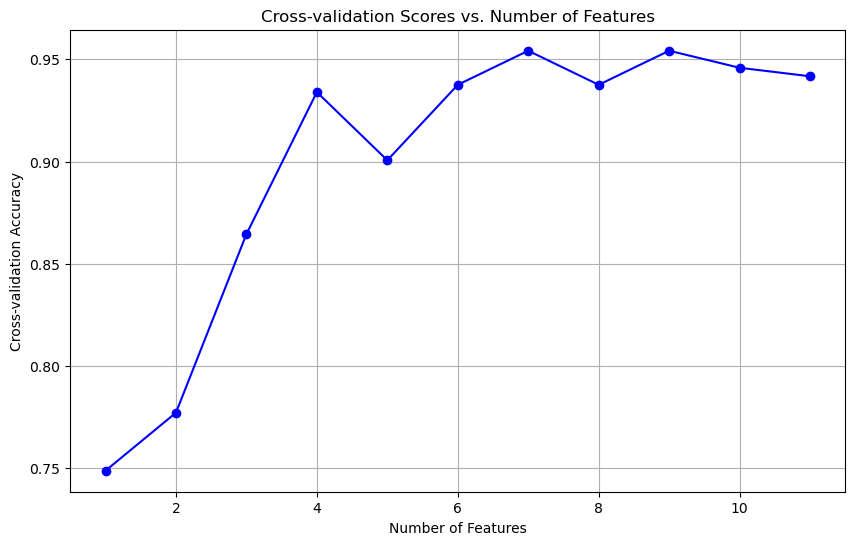

In [222]:
import random
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.exceptions import ConvergenceWarning
import warnings

# Suppress specific warnings (in this case, ConvergenceWarning)
warnings.simplefilter("ignore", ConvergenceWarning)

# Start the timer
start_time = time.time()

# Load Data
data = pd.read_csv("cleaneddata.csv")

# Normalize Data Predictors (Zero-score normalization)
target_column = ['Condition']
predictors = list(set(data.columns) - set(target_column))
data[predictors] = data[predictors] / data[predictors].max()

# Prepare Data
X = data[predictors].values
y = data[target_column].values.ravel()

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define top 3 configurations 
top_configs = [
    {'activation': 'relu', 'solver': 'adam', 'max_iter': 100, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (40, 40)},
    {'activation': 'relu', 'solver': 'adam', 'max_iter': 200, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (40, 40)},
    {'activation': 'relu', 'solver': 'adam', 'max_iter': 700, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (30,30)}
]

# Recursive Feature Elimination (Manual Implementation)
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

# Store scores for each step
all_scores = []  # To store the accuracy for each iteration
best_score = -1  # Initialize the best score as negative to store the maximum score
best_features = None  # To store the feature set that gives the best score
feature_set_sizes = []  # To store the number of features at each step

# Start with all features
remaining_features = list(range(X_train.shape[1]))

# Manual RFE Loop
while len(remaining_features) > 1:  # Ensure at least one feature remains
    scores = []
    
    # Iterate over remaining features
    for feature_to_remove in remaining_features:
        # Select features excluding the one to remove
        features_to_use = [f for f in remaining_features if f != feature_to_remove]
        X_train_selected = X_train[:, features_to_use]

        # Evaluate ANN using cross-validation with each of the top 3 configurations
        fold_scores = []
        for config in top_configs:
            model = MLPClassifier(
                hidden_layer_sizes=config['hidden_layer_sizes'],
                activation=config['activation'],
                solver=config['solver'],
                max_iter=config['max_iter'],
                random_state=0,
                learning_rate_init=config['learning_rate_init']
            )
            
            # Cross-validation loop
            for train_idx, val_idx in cv.split(X_train_selected, y_train):
                model.fit(X_train_selected[train_idx], y_train[train_idx])
                y_pred = model.predict(X_train_selected[val_idx])
                fold_scores.append(accuracy_score(y_train[val_idx], y_pred))
        
        # Average score across folds for each configuration
        scores.append(np.mean(fold_scores))
    
    # Identify the feature whose removal results in the best performance
    best_feature_idx = np.argmax(scores)
    best_feature = remaining_features[best_feature_idx]
    current_score = scores[best_feature_idx]

    # Track the best score and corresponding feature set
    if current_score > best_score:
        best_score = current_score
        best_features = [f for f in remaining_features if f != best_feature]

    # Update the selected features and scores
    all_scores.append(current_score)
    feature_set_sizes.append(len(remaining_features) - 1)  # Track the number of features remaining after each step
    remaining_features.remove(best_feature)

    print(f"Removed feature index: {best_feature}, Score: {current_score:.4f}")

# Select the optimal number of features and get their names
optimal_num_features = len(best_features)
final_selected_feature_names = [predictors[i] for i in best_features]

# Print the optimal number of features and the names
print(f"\nOptimal number of features: {optimal_num_features}")
print(f"Best selected feature names: {final_selected_feature_names}")
print(f"Best accuracy score: {best_score:.2f}")

# Evaluate using the optimal feature subset with the best configuration
X_train_selected = X_train[:, best_features]
X_test_selected = X_test[:, best_features]

# Evaluate the selected feature set using ANN
fold_scores = []
for config in top_configs:
    model = MLPClassifier(
        hidden_layer_sizes=config['hidden_layer_sizes'],
        activation=config['activation'],
        solver=config['solver'],
        max_iter=config['max_iter'],
        random_state=0,
        learning_rate_init=config['learning_rate_init']
    )
    
    # Cross-validation loop
    for train_idx, val_idx in cv.split(X_train_selected, y_train):
        model.fit(X_train_selected[train_idx], y_train[train_idx])
        y_pred = model.predict(X_train_selected[val_idx])
        fold_scores.append(accuracy_score(y_train[val_idx], y_pred))

# Average score for the selected features with the best configuration
average_score = np.mean(fold_scores)
print(f"Final accuracy using optimal selected features: {average_score:.2f}")

# Stop the timer and calculate runtime
end_time = time.time()
runtime = end_time - start_time
print(f"Runtime of the code: {runtime:.2f} seconds")

# Plot the cross-validation scores as a function of the number of features
plt.figure(figsize=(10, 6))
plt.plot(feature_set_sizes, all_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-validation Scores vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Cross-validation Accuracy')
plt.grid(True)
plt.show()


In [252]:
import warnings
from sklearn.exceptions import ConvergenceWarning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time  # Import the time module

# Suppress specific warnings (in this case, ConvergenceWarning)
warnings.simplefilter("ignore", ConvergenceWarning)

# Start the timer
start_time = time.time()

# Load Data
data = pd.read_csv("cleaneddata.csv")

# Normalize Data Predictors (Zero-score normalization)
target_column = ['Condition']
predictors = list(set(data.columns) - set(target_column))
data[predictors] = data[predictors] / data[predictors].max()

# Prepare Data
X = data[predictors].values
y = data[target_column].values.ravel()

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Selected Features from Previous Result (9 features)
selected_features =  ['Cylinder heating zone 4', 'Cylinder heating zone 5', 'Maximum injection pressure', 
                      'Cylinder heating zone 3', 'Cylinder heating zone 2', 'Dosage time', 'Material cushion', 
                      'Cylinder heating zone 1', 'Switch-over volume']

# Convert selected feature names to indices
selected_feature_indices = [predictors.index(feature) for feature in selected_features]

# Prepare Data with Selected Features
X_train_selected = X_train[:, selected_feature_indices]
X_test_selected = X_test[:, selected_feature_indices]

# Top 3 configurations 
configurations = [
    {'activation': 'relu', 'solver': 'adam', 'max_iter': 100, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (40,40)},
    {'activation': 'relu', 'solver': 'adam', 'max_iter': 200, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (40,40)},
    {'activation': 'relu', 'solver': 'adam', 'max_iter': 700, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (30,30)}
]

# Initialize variables to track the best configuration based on accuracy
best_accuracy = 0
best_configuration = None
best_runtime = 0

# Train and evaluate ANN models with the top 3 configurations
for idx, config in enumerate(configurations, start=1):
    # Initialize and Train ANN with the current configuration
    model = MLPClassifier(
        hidden_layer_sizes=config['hidden_layer_sizes'],
        activation=config['activation'],
        solver=config['solver'],
        max_iter=config['max_iter'],
        random_state=0,
        learning_rate_init=config['learning_rate_init']
    )
    
    # Start the timer for each configuration
    model_start_time = time.time()
    
    # Train the model
    model.fit(X_train_selected, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test_selected)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate runtime for the current configuration
    model_end_time = time.time()
    model_runtime = model_end_time - model_start_time

    # Check if the current model gives a better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_configuration = config
        best_runtime = model_runtime

    # Print results for this configuration
    print(f"Configuration {idx}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Runtime: {model_runtime:.2f} seconds\n")

# Print the best configuration results
print(f"\nBest Configuration (based on Accuracy):")
print(f"  Accuracy: {best_accuracy:.4f}")
print(f"  Runtime: {best_runtime:.2f} seconds")
print(f"  Best Configuration Details: {best_configuration}")

# Stop the timer and calculate total runtime
end_time = time.time()
total_runtime = end_time - start_time
print(f"Total Runtime of all configurations: {total_runtime:.2f} seconds")


Configuration 1:
  Accuracy: 0.8857
  Runtime: 0.14 seconds

Configuration 2:
  Accuracy: 0.8571
  Runtime: 0.17 seconds

Configuration 3:
  Accuracy: 0.9143
  Runtime: 0.80 seconds


Best Configuration (based on Accuracy):
  Accuracy: 0.9143
  Runtime: 0.80 seconds
  Best Configuration Details: {'activation': 'relu', 'solver': 'adam', 'max_iter': 700, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (30, 30)}
Total Runtime of all configurations: 1.13 seconds


In [262]:
import warnings
from sklearn.exceptions import ConvergenceWarning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
import time

# Suppress specific warnings (in this case, ConvergenceWarning)
warnings.simplefilter("ignore", ConvergenceWarning)

# Start the timer
start_time = time.time()

# Load Data
data = pd.read_csv("cleaneddata.csv")

# Normalize Data Predictors (Zero-score normalization)
target_column = ['Condition']
predictors = list(set(data.columns) - set(target_column))
data[predictors] = data[predictors] / data[predictors].max()

# Prepare Data
X = data[predictors].values
y = data[target_column].values.ravel()

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Selected Features from Previous Result (9 features)
selected_features = ['Cylinder heating zone 4', 'Cylinder heating zone 5', 'Maximum injection pressure', 
                     'Cylinder heating zone 3', 'Cylinder heating zone 2', 'Dosage time', 'Material cushion', 
                     'Cylinder heating zone 1', 'Switch-over volume']

# Convert selected feature names to indices
selected_feature_indices = [predictors.index(feature) for feature in selected_features]

# Prepare Data with Selected Features
X_train_selected = X_train[:, selected_feature_indices]
X_test_selected = X_test[:, selected_feature_indices]

# Define the hyperparameter grid (original hyperparameter ranges)
param_grid = {
    'hidden_layer_sizes': [(10, 10, 10), (15, 15, 15), (20, 20, 20),(5,),(10,),(15,),(20,),
                           (20, 20), (30, 30), (40, 40), (50, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd','lbfgs'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': np.arange(200, 1001, 100)  # Range from 200 to 1000 with step 100
}

# Combine top 3 configurations explicitly into the grid search
top_3_configurations = [
    {'activation': 'relu', 'solver': 'adam', 'max_iter': 100, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (40, 40)},
    {'activation': 'relu', 'solver': 'adam', 'max_iter': 200, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (40, 40)},
    {'activation': 'relu', 'solver': 'adam', 'max_iter': 700, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (30, 30)}
]

# Initialize the model
model = MLPClassifier(random_state=0)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=4,
    n_jobs=-1,
    verbose=1
)

# Add the top 3 configurations into the search space (implicit inclusion)
grid_search.fit(X_train_selected, y_train)

# Print the best parameters and results
print("Best Hyperparameters:")
print(grid_search.best_params_)


# Stop the timer and calculate total runtime
end_time = time.time()
total_runtime = end_time - start_time
print(f"Total Runtime: {total_runtime:.2f} seconds")


Fitting 4 folds for each of 2673 candidates, totalling 10692 fits
Best Hyperparameters:
{'activation': 'tanh', 'hidden_layer_sizes': (15, 15, 15), 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam'}
Total Runtime: 922.77 seconds


In [264]:
import warnings
from sklearn.exceptions import ConvergenceWarning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time  # Import the time module

# Suppress specific warnings (in this case, ConvergenceWarning)
warnings.simplefilter("ignore", ConvergenceWarning)

# Start the timer
start_time = time.time()

# Load Data
data = pd.read_csv("cleaneddata.csv")

# Normalize Data Predictors (Zero-score normalization)
target_column = ['Condition']
predictors = list(set(data.columns) - set(target_column))
data[predictors] = data[predictors] / data[predictors].max()

# Prepare Data
X = data[predictors].values
y = data[target_column].values.ravel()

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Selected Features from Previous Result
selected_features =['Cylinder heating zone 4', 'Cylinder heating zone 5', 'Maximum injection pressure', 
                     'Cylinder heating zone 3', 'Cylinder heating zone 2', 'Dosage time', 'Material cushion', 
                     'Cylinder heating zone 1', 'Switch-over volume']

# Convert selected feature names to indices
selected_feature_indices = [predictors.index(feature) for feature in selected_features]

# Prepare Data with Selected Features
X_train_selected = X_train[:, selected_feature_indices]
X_test_selected = X_test[:, selected_feature_indices]

# Define the best hyperparameters from the Grid Search result
best_params = {
    'activation': 'tanh',
    'hidden_layer_sizes': (15,15,15),
    'learning_rate_init': 0.001,
    'max_iter': 500,
    'solver': 'adam'
}

# Initialize the ANN with the best parameters
model = MLPClassifier(random_state=0, **best_params)

# Train the model
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Calculate the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy on the test set:", accuracy)

# Stop the timer and calculate runtime
end_time = time.time()
runtime = end_time - start_time
print(f"Runtime of the code: {runtime:.2f} seconds")


Accuracy on the test set: 0.9142857142857143
Runtime of the code: 1.15 seconds


In [266]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming best_model is the best model found from grid search
best_model = grid_search.best_estimator_

# Predict on the training data
predict_train = best_model.predict(X_train_selected)

# Print confusion matrix and classification report for training set
print("MLP confusion_matrix (Train):", "\n", confusion_matrix(y_train, predict_train))
print("\n")
print("MLP classification report (Train):", "\n", classification_report(y_train, predict_train))

# Predict on the test data
predict_test = best_model.predict(X_test_selected)

# Print confusion matrix and classification report for test set
print("MLP confusion_matrix (Test):", "\n", confusion_matrix(y_test, predict_test))
print("\n")
print("MLP classification report (Test):", "\n", classification_report(y_test, predict_test))


MLP confusion_matrix (Train): 
 [[17  0  1]
 [ 0 29  0]
 [ 0  0 34]]


MLP classification report (Train): 
               precision    recall  f1-score   support

  Condition1       1.00      0.94      0.97        18
  Condition3       1.00      1.00      1.00        29
     Normal1       0.97      1.00      0.99        34

    accuracy                           0.99        81
   macro avg       0.99      0.98      0.99        81
weighted avg       0.99      0.99      0.99        81

MLP confusion_matrix (Test): 
 [[ 7  0  1]
 [ 0 11  0]
 [ 2  0 14]]


MLP classification report (Test): 
               precision    recall  f1-score   support

  Condition1       0.78      0.88      0.82         8
  Condition3       1.00      1.00      1.00        11
     Normal1       0.93      0.88      0.90        16

    accuracy                           0.91        35
   macro avg       0.90      0.92      0.91        35
weighted avg       0.92      0.91      0.92        35



In [268]:
import warnings
from sklearn.exceptions import ConvergenceWarning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
import time

# Suppress specific warnings (in this case, ConvergenceWarning)
warnings.simplefilter("ignore", ConvergenceWarning)

# Start the timer
start_time = time.time()

# Load Data
data = pd.read_csv("cleaneddata.csv")

# Normalize Data Predictors (Zero-score normalization)
target_column = ['Condition']
predictors = list(set(data.columns) - set(target_column))
data[predictors] = data[predictors] / data[predictors].max()

# Prepare Data
X = data[predictors].values
y = data[target_column].values.ravel()

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Selected Features from Previous Result (9 features)
selected_features = ['Cylinder heating zone 4', 'Cylinder heating zone 5', 'Maximum injection pressure', 
                     'Cylinder heating zone 3', 'Cylinder heating zone 2', 'Dosage time', 'Material cushion', 
                     'Cylinder heating zone 1', 'Switch-over volume']

# Convert selected feature names to indices
selected_feature_indices = [predictors.index(feature) for feature in selected_features]

# Prepare Data with Selected Features
X_train_selected = X_train[:, selected_feature_indices]
X_test_selected = X_test[:, selected_feature_indices]

# Define the hyperparameter grid (original hyperparameter ranges)
param_grid = {
    'hidden_layer_sizes': [(10, 10, 10), (15, 15, 15), (20, 20, 20), (5,), (10,), (15,), (20,),
                           (20, 20), (30, 30), (40, 40), (50, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': np.arange(200, 1001, 100)  # Range from 200 to 1000 with step 100
}

# Initialize the model
model = MLPClassifier(random_state=0)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=100,  # Number of random combinations to try
    cv=4,
    n_jobs=-1,
    verbose=1,
    random_state=0
)

# Fit the Randomized Search
random_search.fit(X_train_selected, y_train)

# Print the best parameters and results
print("Best Hyperparameters:")
print(random_search.best_params_)

# Stop the timer and calculate total runtime
end_time = time.time()
total_runtime = end_time - start_time
print(f"Total Runtime: {total_runtime:.2f} seconds")


Fitting 4 folds for each of 100 candidates, totalling 400 fits
Best Hyperparameters:
{'solver': 'adam', 'max_iter': 900, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (30, 30), 'activation': 'tanh'}
Total Runtime: 34.04 seconds


In [104]:
import warnings
from sklearn.exceptions import ConvergenceWarning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time  # Import the time module

# Suppress specific warnings (in this case, ConvergenceWarning)
warnings.simplefilter("ignore", ConvergenceWarning)

# Start the timer
start_time = time.time()

# Load Data
data = pd.read_csv("cleaneddata.csv")

# Normalize Data Predictors (Zero-score normalization)
target_column = ['Condition']
predictors = list(set(data.columns) - set(target_column))
data[predictors] = data[predictors] / data[predictors].max()

# Prepare Data
X = data[predictors].values
y = data[target_column].values.ravel()

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Selected Features from Previous Result
selected_features =['Cylinder heating zone 4', 'Cylinder heating zone 5', 'Maximum injection pressure', 
                     'Cylinder heating zone 3', 'Cylinder heating zone 2', 'Dosage time', 'Material cushion', 
                     'Cylinder heating zone 1', 'Switch-over volume']

# Convert selected feature names to indices
selected_feature_indices = [predictors.index(feature) for feature in selected_features]

# Prepare Data with Selected Features
X_train_selected = X_train[:, selected_feature_indices]
X_test_selected = X_test[:, selected_feature_indices]

# Define the best hyperparameters from the Grid Search result
best_params = {
    'activation': 'tanh',
    'hidden_layer_sizes': (15,15,15),
    'learning_rate_init': 0.001,
    'max_iter': 500,
    'solver': 'adam'
}

# Initialize the ANN with the best parameters
model = MLPClassifier(random_state=0, **best_params)

# Train the model
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Calculate the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy on the test set:", accuracy)

# Stop the timer and calculate runtime
end_time = time.time()
runtime = end_time - start_time
print(f"Runtime of the code: {runtime:.2f} seconds")


Accuracy of the Neural Network model on the test set: 0.9428571428571428


In [106]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming best_model is the best model found from randomzied search
best_model = random_search.best_estimator_

# Predict on the training data
predict_train = best_model.predict(X_train_selected)

# Print confusion matrix and classification report for training set
print("MLP confusion_matrix (Train):", "\n", confusion_matrix(y_train, predict_train))
print("\n")
print("MLP classification report (Train):", "\n", classification_report(y_train, predict_train))

# Predict on the test data
predict_test = best_model.predict(X_test_selected)

# Print confusion matrix and classification report for test set
print("MLP confusion_matrix (Test):", "\n", confusion_matrix(y_test, predict_test))
print("\n")
print("MLP classification report (Test):", "\n", classification_report(y_test, predict_test))


MLP confusion_matrix (Train): 
 [[18  0  2]
 [ 0 28  0]
 [ 3  0 30]]


MLP classification report (Train): 
               precision    recall  f1-score   support

  Condition1       0.86      0.90      0.88        20
  Condition3       1.00      1.00      1.00        28
     Normal1       0.94      0.91      0.92        33

    accuracy                           0.94        81
   macro avg       0.93      0.94      0.93        81
weighted avg       0.94      0.94      0.94        81

MLP confusion_matrix (Test): 
 [[ 6  0  0]
 [ 0 12  0]
 [ 2  0 15]]


MLP classification report (Test): 
               precision    recall  f1-score   support

  Condition1       0.75      1.00      0.86         6
  Condition3       1.00      1.00      1.00        12
     Normal1       1.00      0.88      0.94        17

    accuracy                           0.94        35
   macro avg       0.92      0.96      0.93        35
weighted avg       0.96      0.94      0.95        35

